In [2]:
#### bee hives
import requests
import numpy as np
import pandas as pd
from pprint import pprint
apikey = "15B191E7-B8C5-3AF1-9E28-97FD910F9119"
usda_url ="http://quickstats.nass.usda.gov/api/api_GET/?key=15B191E7-B8C5-3AF1-9E28-97FD910F9119&source_desc=SURVEY&commodity_desc=HONEY&agg_level_desc=STATE&param=short_desc"
usda_data= requests.get(usda_url).json()
usda_data
#extracted data using API key and converted into JSON#

{'data': [{'state_alpha': 'AL',
   'group_desc': 'SPECIALTY',
   'country_code': '9000',
   'state_ansi': '01',
   'reference_period_desc': 'MARKETING YEAR',
   'zip_5': '',
   'sector_desc': 'ANIMALS & PRODUCTS',
   'commodity_desc': 'HONEY',
   'region_desc': '',
   'county_code': '',
   'state_fips_code': '01',
   'agg_level_desc': 'STATE',
   'unit_desc': '$ / LB',
   'domaincat_desc': 'NOT SPECIFIED',
   'asd_code': '',
   'freq_desc': 'ANNUAL',
   'state_name': 'ALABAMA',
   'statisticcat_desc': 'PRICE RECEIVED',
   'Value': '5.43',
   'class_desc': 'ALL CLASSES',
   'county_name': '',
   'source_desc': 'SURVEY',
   'end_code': '00',
   'load_time': '2021-03-18 15:00:29',
   'congr_district_code': '',
   'begin_code': '00',
   'short_desc': 'HONEY - PRICE RECEIVED, MEASURED IN $ / LB',
   'year': 2020,
   'watershed_desc': '',
   'week_ending': '',
   'domain_desc': 'TOTAL',
   'location_desc': 'ALABAMA',
   'CV (%)': '',
   'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
   '

In [5]:
len(new_usda_list)

21642

In [4]:
#Modified old code to make it simple. 
new_usda_list=usda_data['data']#

In [72]:
#created DataFrame by passing in the list
usda_df=pd.DataFrame(new_usda_list)

pd.set_option('display.max_columns', None)
usda_df.head(1)

,state_alpha,group_desc,country_code,state_ansi,reference_period_desc,zip_5,sector_desc,commodity_desc,region_desc,county_code,state_fips_code,agg_level_desc,unit_desc,domaincat_desc,asd_code,freq_desc,state_name,statisticcat_desc,Value,class_desc,county_name,source_desc,end_code,load_time,congr_district_code,begin_code,short_desc,year,watershed_desc,week_ending,domain_desc,location_desc,CV (%),prodn_practice_desc,county_ansi,util_practice_desc,asd_desc,watershed_code,country_name
0,AL,SPECIALTY,9000,01,MARKETING YEAR,,ANIMALS & PRODUCTS,HONEY,,,01,STATE,$ / LB,NOT SPECIFIED,,ANNUAL,ALABAMA,PRICE RECEIVED,5.43,ALL CLASSES,,SURVEY,00,2021-03-18 15:00:29,,00,"HONEY - PRICE RECEIVED, MEASURED IN $ / LB",2020,,,TOTAL,ALABAMA,,ALL PRODUCTION PRACTICES,,ALL UTILIZATION PRACTICES,,00000000,UNITED STATES


In [7]:
usda_df.columns

Index(['state_alpha', 'group_desc', 'country_code', 'state_ansi',
       'reference_period_desc', 'zip_5', 'sector_desc', 'commodity_desc',
       'region_desc', 'county_code', 'state_fips_code', 'agg_level_desc',
       'unit_desc', 'domaincat_desc', 'asd_code', 'freq_desc', 'state_name',
       'statisticcat_desc', 'Value', 'class_desc', 'county_name',
       'source_desc', 'end_code', 'load_time', 'congr_district_code',
       'begin_code', 'short_desc', 'year', 'watershed_desc', 'week_ending',
       'domain_desc', 'location_desc', 'CV (%)', 'prodn_practice_desc',
       'county_ansi', 'util_practice_desc', 'asd_desc', 'watershed_code',
       'country_name'],
      dtype='object')

In [8]:
#Selected required columns (23 columns) in the process of data clean-up
usda_mod_df=usda_df[['group_desc','reference_period_desc', 'load_time', 'country_name', 'source_desc', 'country_code', 'location_desc', 'state_alpha', 'prodn_practice_desc', 'commodity_desc', 'sector_desc', 'agg_level_desc', 'class_desc', 'year',  'state_name', 'Value', 'short_desc', 'domaincat_desc', 'state_ansi', 'domain_desc', 'statisticcat_desc', 'util_practice_desc', 'freq_desc']]
usda_mod_df.head(1)

,group_desc,reference_period_desc,load_time,country_name,source_desc,country_code,location_desc,state_alpha,prodn_practice_desc,commodity_desc,...,year,state_name,Value,short_desc,domaincat_desc,state_ansi,domain_desc,statisticcat_desc,util_practice_desc,freq_desc
0,SPECIALTY,MARKETING YEAR,2021-03-18 15:00:29,UNITED STATES,SURVEY,9000,ALABAMA,AL,ALL PRODUCTION PRACTICES,HONEY,...,2020,ALABAMA,5.43,"HONEY - PRICE RECEIVED, MEASURED IN $ / LB",NOT SPECIFIED,01,TOTAL,PRICE RECEIVED,ALL UTILIZATION PRACTICES,ANNUAL


In [9]:
#Original dataframe with selected columns (21642 rows, 8 columns)
usda_mod_df2=usda_mod_df[['reference_period_desc', 'source_desc', 'location_desc', 'sector_desc', 'year', 'Value', 'short_desc', 'statisticcat_desc']]
usda_mod_df2#

,reference_period_desc,source_desc,location_desc,sector_desc,year,Value,short_desc,statisticcat_desc
0,MARKETING YEAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,5.43,"HONEY - PRICE RECEIVED, MEASURED IN $ / LB",PRICE RECEIVED
1,MARKETING YEAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2019,3.38,"HONEY - PRICE RECEIVED, MEASURED IN $ / LB",PRICE RECEIVED
2,MARKETING YEAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2018,3.72,"HONEY - PRICE RECEIVED, MEASURED IN $ / LB",PRICE RECEIVED
3,MARKETING YEAR,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,2.18,"HONEY - PRICE RECEIVED, MEASURED IN $ / LB",PRICE RECEIVED
4,MARKETING YEAR,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2019,2.04,"HONEY - PRICE RECEIVED, MEASURED IN $ / LB",PRICE RECEIVED
...,...,...,...,...,...,...,...,...
21637,OCT THRU DEC,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2016,0,"HONEY, BEE COLONIES, RENOVATED - INVENTORY, ME...",INVENTORY
21638,JAN THRU MAR,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2015,2,"HONEY, BEE COLONIES, RENOVATED - INVENTORY, ME...",INVENTORY
21639,APR THRU JUN,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2015,18,"HONEY, BEE COLONIES, RENOVATED - INVENTORY, ME...",INVENTORY
21640,JUL THRU SEP,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2015,6,"HONEY, BEE COLONIES, RENOVATED - INVENTORY, ME...",INVENTORY


In [10]:
#Extracted data with CCD for 2020 year (90 rows, 8 columns)
usda_collapse_df2 = usda_mod_df2[usda_mod_df2['short_desc'].str.contains("COLONY COLLAPSE DISORDER")]
usda_collapse_2020 = usda_collapse_df2[usda_collapse_df2['year']==2020]
usda_collapse_2020#

,reference_period_desc,source_desc,location_desc,sector_desc,year,Value,short_desc,statisticcat_desc
17562,JAN THRU MAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,70,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17563,APR THRU JUN,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,410,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17567,JAN THRU MAR,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,"4,300","HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17568,APR THRU JUN,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,170,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17572,JAN THRU MAR,SURVEY,ARKANSAS,ANIMALS & PRODUCTS,2020,390,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
...,...,...,...,...,...,...,...,...
17773,APR THRU JUN,SURVEY,WEST VIRGINIA,ANIMALS & PRODUCTS,2020,130,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17777,JAN THRU MAR,SURVEY,WISCONSIN,ANIMALS & PRODUCTS,2020,"1,600","HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17778,APR THRU JUN,SURVEY,WISCONSIN,ANIMALS & PRODUCTS,2020,90,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17782,JAN THRU MAR,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,"1,500","HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"


In [11]:
#Removed "," from value columns
usda_collapse_2020['Value']=usda_collapse_2020['Value'].str.replace(',','')
usda_collapse_2020#

<ipython-input-11-f7fef2fdf53f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usda_collapse_2020['Value']=usda_collapse_2020['Value'].str.replace(',','')


,reference_period_desc,source_desc,location_desc,sector_desc,year,Value,short_desc,statisticcat_desc
17562,JAN THRU MAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,70,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17563,APR THRU JUN,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,410,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17567,JAN THRU MAR,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,4300,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17568,APR THRU JUN,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,170,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17572,JAN THRU MAR,SURVEY,ARKANSAS,ANIMALS & PRODUCTS,2020,390,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
...,...,...,...,...,...,...,...,...
17773,APR THRU JUN,SURVEY,WEST VIRGINIA,ANIMALS & PRODUCTS,2020,130,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17777,JAN THRU MAR,SURVEY,WISCONSIN,ANIMALS & PRODUCTS,2020,1600,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17778,APR THRU JUN,SURVEY,WISCONSIN,ANIMALS & PRODUCTS,2020,90,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17782,JAN THRU MAR,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,1500,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"


In [12]:
#converted value column in CCD 2020 from str to float
usda_collapse_2020['Value'] = usda_collapse_2020['Value'].astype(float)
usda_collapse_2020['Value'].dtype#


<ipython-input-12-0348fe28385e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usda_collapse_2020['Value'] = usda_collapse_2020['Value'].astype(float)


dtype('float64')

In [13]:
usda_collapse_2020.Value.sum()

161060.0

In [14]:
#imported CCD 2020 data to local space
usda_collapse_2020.to_csv(r'C:\Users\watso\Documents\Data_Science_Bootcamp\exploratory_data_analysis_project.csv')

In [15]:
#Extracted data for honey bee loss with pesticides for 2020
usda_pesticide_df2 = usda_mod_df2[usda_mod_df2['short_desc'].str.contains("AFFECTED BY PESTICIDES")]
usda_pesticide_2020 = usda_pesticide_df2[usda_pesticide_df2['year']==2020]
#converted value column from string to float
usda_pesticide_2020['Value']=pd.to_numeric(usda_pesticide_2020['Value'], errors='coerce')
usda_pesticide_2020['Value'].dtype
#92 rows, 8 columns#

<ipython-input-15-6a035ea9cd38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usda_pesticide_2020['Value']=pd.to_numeric(usda_pesticide_2020['Value'], errors='coerce')


dtype('float64')

#imported pesticides 2020 data to local space as csv
usda_pesticide_2020.to_csv(r'/Users/trimpu/Documents/exploratory_data_analysis_project.csv')

In [16]:
#usda_pesticide_2020.iloc[20][5], iloc[69][5], iloc[86][5] . Changed these values to 0. 
usda_pesticide_2020['Value'] = usda_pesticide_2020['Value'].replace(['                 (Z)'], '0')
usda_pesticide_2020
#usda_pesticide_2020['Value']=usda_pesticide_2020['Value'].str.replace(' ','')
#usda_pesticide_2020['Value'].sum()#

<ipython-input-16-ca4873b56fde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usda_pesticide_2020['Value'] = usda_pesticide_2020['Value'].replace(['                 (Z)'], '0')


,reference_period_desc,source_desc,location_desc,sector_desc,year,Value,short_desc,statisticcat_desc
9322,JAN THRU MAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,0.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
9323,APR THRU JUN,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,7.7,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
9343,JAN THRU MAR,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
9344,APR THRU JUN,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,4.2,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
9364,JAN THRU MAR,SURVEY,ARKANSAS,ANIMALS & PRODUCTS,2020,2.6,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
...,...,...,...,...,...,...,...,...
10226,APR THRU JUN,SURVEY,WISCONSIN,ANIMALS & PRODUCTS,2020,25.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
10246,JAN THRU MAR,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
10247,APR THRU JUN,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,1.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
10267,JAN THRU MAR,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY


In [17]:
# Applying each row in value column with float datatype. 
usda_pesticide_2020['Value'].apply(lambda x: float(x))
usda_pesticide_2020

,reference_period_desc,source_desc,location_desc,sector_desc,year,Value,short_desc,statisticcat_desc
9322,JAN THRU MAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,0.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
9323,APR THRU JUN,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,7.7,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
9343,JAN THRU MAR,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
9344,APR THRU JUN,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,4.2,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
9364,JAN THRU MAR,SURVEY,ARKANSAS,ANIMALS & PRODUCTS,2020,2.6,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
...,...,...,...,...,...,...,...,...
10226,APR THRU JUN,SURVEY,WISCONSIN,ANIMALS & PRODUCTS,2020,25.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
10246,JAN THRU MAR,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
10247,APR THRU JUN,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,1.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
10267,JAN THRU MAR,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY


In [18]:
#Fetched inventory with required columns from the original DataFrame. 
usda_inventory_df = usda_mod_df[usda_mod_df['short_desc'].str.contains("INVENTORY, MAX,")]
usda_inventory_df1 = usda_inventory_df[usda_inventory_df['year']==2020]
usda_inventory_df1=usda_inventory_df1[['reference_period_desc','source_desc','location_desc',
                                       'sector_desc','year','Value','short_desc','statisticcat_desc']]
#Renamed value column in inventory dataframe to inventory_value. Inplace=true changes the original dataframe
usda_inventory_df1.rename(columns={'Value':'inventory_value'},inplace=True)
usda_inventory_df1#

,reference_period_desc,source_desc,location_desc,sector_desc,year,inventory_value,short_desc,statisticcat_desc
16596,JAN THRU MAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,"8,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"
16597,APR THRU JUN,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,"8,500","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"
16617,JAN THRU MAR,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,"32,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"
16618,APR THRU JUN,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,"26,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"
16638,JAN THRU MAR,SURVEY,ARKANSAS,ANIMALS & PRODUCTS,2020,"17,500","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"
...,...,...,...,...,...,...,...,...
17500,APR THRU JUN,SURVEY,WISCONSIN,ANIMALS & PRODUCTS,2020,"53,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"
17520,JAN THRU MAR,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,"17,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"
17521,APR THRU JUN,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,"24,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"
17541,JAN THRU MAR,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2020,"8,200","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"


In [19]:
#imported inventory 2020 data to local space as csv
usda_inventory_df1.to_csv(r'C:\Users\watso\Documents\Data_Science_Bootcamp\exploratory_data_analysis_project\inventory_EDA_project.csv')

In [20]:
#merged inventory dataframe with pesticides dataframe, so that "value" column in pesticides 
#which is measured in percentage of inventory_value can be calculated.  
inv_pest=pd.merge(usda_inventory_df1,usda_pesticide_2020,how='outer',on=['reference_period_desc','location_desc'])

In [21]:
inv_pest

,reference_period_desc,source_desc_x,location_desc,sector_desc_x,year_x,inventory_value,short_desc_x,statisticcat_desc_x,source_desc_y,sector_desc_y,year_y,Value,short_desc_y,statisticcat_desc_y
0,JAN THRU MAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,"8,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,0.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
1,APR THRU JUN,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,"8,500","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,7.7,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
2,JAN THRU MAR,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,"32,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
3,APR THRU JUN,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,"26,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,4.2,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
4,JAN THRU MAR,SURVEY,ARKANSAS,ANIMALS & PRODUCTS,2020,"17,500","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,2.6,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,APR THRU JUN,SURVEY,WISCONSIN,ANIMALS & PRODUCTS,2020,"53,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,25.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
88,JAN THRU MAR,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,"17,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
89,APR THRU JUN,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,"24,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,1.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
90,JAN THRU MAR,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2020,"8,200","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY


In [22]:
#Replaced "," with '' in inv_pest['inventory_value'] column. 
inv_pest['inventory_value']=inv_pest['inventory_value'].str.replace(',','')
inv_pest['inventory_value']
#converted to float to make sure all the values are on float datatype. 
inv_pest['inventory_value']=inv_pest['inventory_value'].apply(lambda x: float(x))
inv_pest['inventory_value'].dtype
 
#inv_pest['inventory_value']=pd.to_numeric(inv_pest['inventory_value'], errors='ignore')
#inv_pest['inventory_value']

#usda_pesticide_2020['Value'].apply(lambda x: float(x))

dtype('float64')

In [23]:
(0.1*8000)/100

8.0

In [24]:
#Define a temporary function that takes in 2 values and calculates 
#what percentage of total inventory is effected with pesticides for each record. 
def temp_func(val,inv_val):
    print (inv_val)
    f_val=(val*inv_val)/100
    return f_val

#inv_pest['pest_value'] - a new column is craeted in inv_pest dataframe
inv_pest['pest_value']=inv_pest.apply(lambda x: temp_func(x['Value'],x['inventory_value']), axis=1)
inv_pest


8000.0
8500.0
32000.0
26000.0
17500.0
17000.0
1710000.0
1200000.0
16000.0
27000.0
4100.0
4300.0
310000.0
325000.0
121000.0
143000.0
16000.0
15500.0
168000.0
81000.0
13000.0
12000.0
11500.0
12000.0
21000.0
29000.0
7000.0
8000.0
10500.0
11000.0
48000.0
53000.0
1700.0
22000.0
7500.0
8000.0
4000.0
13500.0
65000.0
79000.0
57000.0
126000.0
28000.0
37000.0
8500.0
6500.0
48000.0
120000.0
17000.0
39000.0
7000.0
20000.0
6000.0
6000.0
36000.0
56000.0
23000.0
25000.0
82000.0
395000.0
20000.0
16500.0
19500.0
16000.0
108000.0
95000.0
24000.0
27000.0
16500.0
20000.0
20000.0
205000.0
14000.0
13500.0
340000.0
385000.0
17000.0
31000.0
7500.0
7000.0
7000.0
8000.0
74000.0
114000.0
8000.0
7500.0
26000.0
53000.0
17000.0
24000.0
8200.0
7440.0


,reference_period_desc,source_desc_x,location_desc,sector_desc_x,year_x,inventory_value,short_desc_x,statisticcat_desc_x,source_desc_y,sector_desc_y,year_y,Value,short_desc_y,statisticcat_desc_y,pest_value
0,JAN THRU MAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,8000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,0.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,8.0
1,APR THRU JUN,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,8500.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,7.7,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,654.5
2,JAN THRU MAR,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,32000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,0.0
3,APR THRU JUN,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,26000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,4.2,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,1092.0
4,JAN THRU MAR,SURVEY,ARKANSAS,ANIMALS & PRODUCTS,2020,17500.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,2.6,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,APR THRU JUN,SURVEY,WISCONSIN,ANIMALS & PRODUCTS,2020,53000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,25.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,13303.0
88,JAN THRU MAR,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,17000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,0.0
89,APR THRU JUN,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,24000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,1.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,264.0
90,JAN THRU MAR,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2020,8200.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,0.0


In [25]:
(0.1*8000)/100

8.0

In [26]:
inv_pest.head(1)

,reference_period_desc,source_desc_x,location_desc,sector_desc_x,year_x,inventory_value,short_desc_x,statisticcat_desc_x,source_desc_y,sector_desc_y,year_y,Value,short_desc_y,statisticcat_desc_y,pest_value
0,JAN THRU MAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,8000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,0.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,8.0


In [27]:
# need to compare pest_value in inv_pest dataframe with value column in usda_collapse_2020 dataframe.
#Grouped inventory_pesticide merged dataframe by location_desc and short_des column. Aggregated pest_value column. 
grouped_inv_pest=inv_pest.groupby(["location_desc", 'short_desc_x'])
grp_inv_pest_df=grouped_inv_pest.aggregate({'pest_value': 'sum'})
grp_inv_pest_df

,,pest_value
location_desc,short_desc_x,
ALABAMA,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED IN COLONIES",662.5
ARIZONA,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED IN COLONIES",1092.0
ARKANSAS,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED IN COLONIES",4637.0
CALIFORNIA,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED IN COLONIES",155430.0
COLORADO,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED IN COLONIES",64.0
CONNECTICUT,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED IN COLONIES",0.0
FLORIDA,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED IN COLONIES",34305.0
GEORGIA,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED IN COLONIES",4653.0
HAWAII,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED IN COLONIES",0.0


In [28]:
#Grouped CCD dataframe with location_desc and short_desc columns and aggregated the value for each state. 
grouped_usda_collapse_df=usda_collapse_2020.groupby(["location_desc", 'short_desc'])
grp_CCD_df=grouped_usda_collapse_df.aggregate({'Value': 'sum'})
grp_CCD_df

,,Value
location_desc,short_desc,
ALABAMA,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DISORDER, MEASURED IN COLONIES",480.0
ARIZONA,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DISORDER, MEASURED IN COLONIES",4470.0
ARKANSAS,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DISORDER, MEASURED IN COLONIES",1290.0
CALIFORNIA,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DISORDER, MEASURED IN COLONIES",22200.0
COLORADO,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DISORDER, MEASURED IN COLONIES",930.0
CONNECTICUT,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DISORDER, MEASURED IN COLONIES",10.0
FLORIDA,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DISORDER, MEASURED IN COLONIES",31000.0
GEORGIA,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DISORDER, MEASURED IN COLONIES",11800.0
HAWAII,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DISORDER, MEASURED IN COLONIES",260.0


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy import stats

from matplotlib import pyplot as plt


In [30]:
#grp_inv_pest_df["pest_value"]
#grp_inv_pest_df["location_desc"]


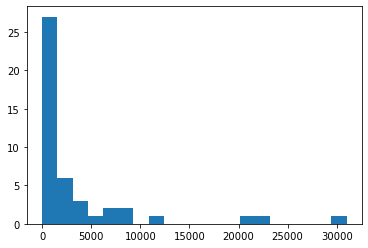

In [31]:
#Histogram of lost colonies to colony collapse disorder
plt.hist(grp_CCD_df["Value"], bins=20)
plt.show()

In [32]:
grp_CCD_df["Value"].min() #0.0
grp_CCD_df["Value"].max() # 31000

grp_inv_pest_df["pest_value"].min() #0.0
grp_inv_pest_df["pest_value"].max() #155430.0
len(grp_inv_pest_df) #46
len(grp_CCD_df) #45


45

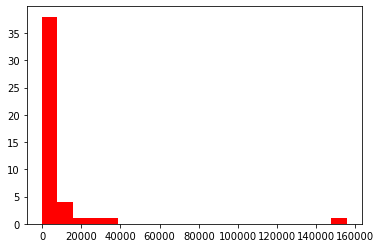

In [33]:
#Histogram of colonies affected by pesticides
plt.hist(grp_inv_pest_df["pest_value"], bins=20, color='red')
plt.show()

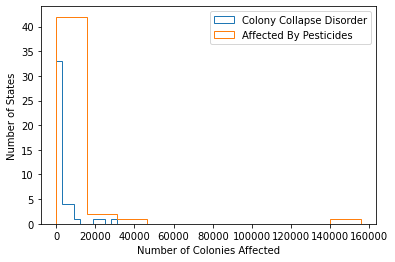

In [34]:
#Step histogram of both colony collapse disorder and pesticides
fig, ax = plt.subplots()
ax.hist(grp_CCD_df["Value"], label="Colony Collapse Disorder", histtype="step")
ax.hist(grp_inv_pest_df["pest_value"], label="Affected By Pesticides", histtype="step")
ax.set_xlabel("Number of Colonies Affected")
ax.set_ylabel("Number of States")
ax.legend()
plt.show()


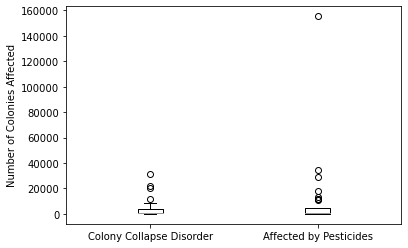

In [35]:
#Box plot of both colony collapse disorder and colonies affected by pesticides
fig, ax = plt.subplots()
ax.boxplot([grp_CCD_df["Value"], grp_inv_pest_df["pest_value"]])
ax.set_xticklabels(["Colony Collapse Disorder", "Affected by Pesticides"])
ax.set_ylabel("Number of Colonies Affected")
plt.show()


<ipython-input-36-b6f454fbd2cf>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(usda_collapse_2020["location_desc"], rotation=90)


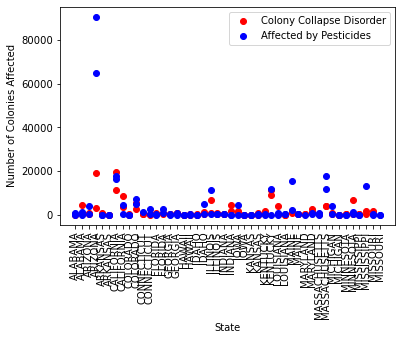

In [36]:
#Scatter plot of both colonies affected by pesticides and colony collapse disorder
fig, ax = plt.subplots()
ax.scatter(usda_collapse_2020["location_desc"], usda_collapse_2020["Value"], color="red", label="Colony Collapse Disorder")
ax.scatter(inv_pest["location_desc"], inv_pest["pest_value"], color="blue", label="Affected by Pesticides")
ax.legend()
ax.set_xticklabels(usda_collapse_2020["location_desc"], rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Number of Colonies Affected")
plt.show()


In [37]:
#Renamed the column 'Value' to 'value_ccd' in order to be able to merge this df into the one with the inventory and pesticide numbers
usda_collapse_2020_new=usda_collapse_2020.rename(columns={'Value': 'value_ccd' })

In [38]:
#Merge to get all value data in one place and grouped by state and time period
usda_total=pd.merge(inv_pest,usda_collapse_2020_new,how='outer',on=['reference_period_desc','location_desc'])
usda_total

,reference_period_desc,source_desc_x,location_desc,sector_desc_x,year_x,inventory_value,short_desc_x,statisticcat_desc_x,source_desc_y,sector_desc_y,...,Value,short_desc_y,statisticcat_desc_y,pest_value,source_desc,sector_desc,year,value_ccd,short_desc,statisticcat_desc
0,JAN THRU MAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,8000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,...,0.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,8.0,SURVEY,ANIMALS & PRODUCTS,2020.0,70.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
1,APR THRU JUN,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,8500.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,...,7.7,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,654.5,SURVEY,ANIMALS & PRODUCTS,2020.0,410.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
2,JAN THRU MAR,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,32000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,...,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,0.0,SURVEY,ANIMALS & PRODUCTS,2020.0,4300.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
3,APR THRU JUN,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,26000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,...,4.2,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,1092.0,SURVEY,ANIMALS & PRODUCTS,2020.0,170.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
4,JAN THRU MAR,SURVEY,ARKANSAS,ANIMALS & PRODUCTS,2020,17500.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,...,2.6,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,455.0,SURVEY,ANIMALS & PRODUCTS,2020.0,390.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,APR THRU JUN,SURVEY,WISCONSIN,ANIMALS & PRODUCTS,2020,53000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,...,25.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,13303.0,SURVEY,ANIMALS & PRODUCTS,2020.0,90.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
88,JAN THRU MAR,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,17000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,...,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,0.0,SURVEY,ANIMALS & PRODUCTS,2020.0,1500.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
89,APR THRU JUN,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,24000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,...,1.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,264.0,SURVEY,ANIMALS & PRODUCTS,2020.0,500.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
90,JAN THRU MAR,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2020,8200.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,...,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#Calculated the percentage of colonies lost to CCD
ccd_perc=round((usda_total['value_ccd']/usda_total['inventory_value'])*100, 2)
ccd_perc

0      0.88
1      4.82
2     13.44
3      0.65
4      2.23
      ...  
87     0.17
88     8.82
89     2.08
90      NaN
91      NaN
Length: 92, dtype: float64

In [40]:
#Created a copy of df containing only percent of colonies affected by pesticides
usda_total_comp=usda_total[['location_desc', 'reference_period_desc', 'Value']]
usda_total_compare=usda_total_comp.copy()
#added the percentage lost to colony collapse
usda_total_compare['ccd_perc']=ccd_perc
#Changed column names to appropriately reflect the values
usda_total_compare.rename(columns={'Value': '%_Colonies_Affected_by_Pesticides', 'ccd_perc': "%_Colonies_Lost_to_Colony_Collapse_Disorder"}, inplace=True)
#Replace NaN values in "OTHER STATES" with 0
usda_total_compare["%_Colonies_Lost_to_Colony_Collapse_Disorder"] = usda_total_compare["%_Colonies_Lost_to_Colony_Collapse_Disorder"].fillna(0)
usda_total_compare['%_Colonies_Affected_by_Pesticides'] = usda_total_compare["%_Colonies_Affected_by_Pesticides"].fillna(0)
usda_total_compare

,location_desc,reference_period_desc,%_Colonies_Affected_by_Pesticides,%_Colonies_Lost_to_Colony_Collapse_Disorder
0,ALABAMA,JAN THRU MAR,0.1,0.88
1,ALABAMA,APR THRU JUN,7.7,4.82
2,ARIZONA,JAN THRU MAR,0.0,13.44
3,ARIZONA,APR THRU JUN,4.2,0.65
4,ARKANSAS,JAN THRU MAR,2.6,2.23
...,...,...,...,...
87,WISCONSIN,APR THRU JUN,25.1,0.17
88,WYOMING,JAN THRU MAR,0.0,8.82
89,WYOMING,APR THRU JUN,1.1,2.08
90,OTHER STATES,JAN THRU MAR,0.0,0.00


In [41]:
grp_usda_total_compare=usda_total_compare.groupby(usda_total_compare['location_desc']).sum()
#grp_usda_total_compare.aggregate({"%_Colonies_Affected_by_Pesticides": "sum",'%_Colonies_Lost_to_Colony_Collapse_Disorder':"sum"})
grp_usda_total_compare

,%_Colonies_Affected_by_Pesticides,%_Colonies_Lost_to_Colony_Collapse_Disorder
location_desc,,
ALABAMA,7.8,5.70
ARIZONA,4.2,14.09
ARKANSAS,27.2,7.52
CALIFORNIA,10.7,1.38
COLORADO,0.4,5.03
CONNECTICUT,0.0,0.24
FLORIDA,10.8,9.71
GEORGIA,3.3,9.33
HAWAII,0.0,1.62


In [42]:
grp1_usda_total_compare=grp_usda_total_compare.head(23)
grp1_usda_total_compare
grp2_usda_total_compare=grp_usda_total_compare.tail(23)
grp2_usda_total_compare

,%_Colonies_Affected_by_Pesticides,%_Colonies_Lost_to_Colony_Collapse_Disorder
location_desc,,
MONTANA,0.0,10.63
NEBRASKA,10.9,10.61
NEW JERSEY,0.2,0.91
NEW MEXICO,0.4,0.00
NEW YORK,0.2,2.65
NORTH CAROLINA,0.6,9.42
NORTH DAKOTA,3.0,16.30
OHIO,5.9,20.29
OKLAHOMA,1.4,0.56


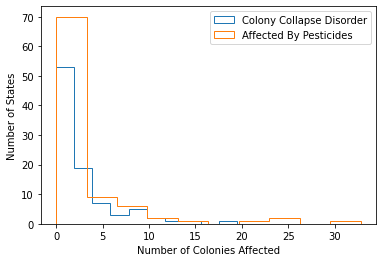

In [43]:
#Step histogram of both colony collapse disorder and pesticides percentages
fig, ax = plt.subplots()
ax.hist(usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'], label="Colony Collapse Disorder", histtype="step")
ax.hist(usda_total_compare['%_Colonies_Affected_by_Pesticides'], label="Affected By Pesticides", histtype="step")
ax.set_xlabel("Number of Colonies Affected")
ax.set_ylabel("Number of States")
ax.legend()
plt.show()


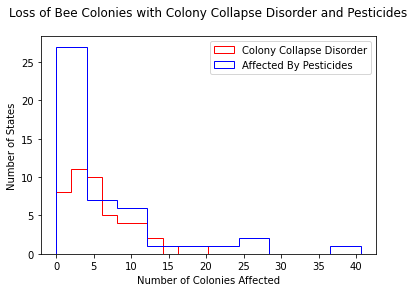

In [44]:
#Step histogram of both colony collapse disorder and pesticides percentages
fig, ax = plt.subplots()
ax.hist(grp_usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'], label="Colony Collapse Disorder", color='red', histtype="step")
ax.hist(grp_usda_total_compare['%_Colonies_Affected_by_Pesticides'], label="Affected By Pesticides", color='blue', histtype="step")
ax.set_title("Loss of Bee Colonies with Colony Collapse Disorder and Pesticides", pad=20)
ax.set_xlabel("Number of Colonies Affected")
ax.set_ylabel("Number of States")
ax.legend()
plt.savefig("bee_hist")
plt.show()


<ipython-input-57-c0bbe140a771>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grp1_usda_total_compare.index, rotation=90)


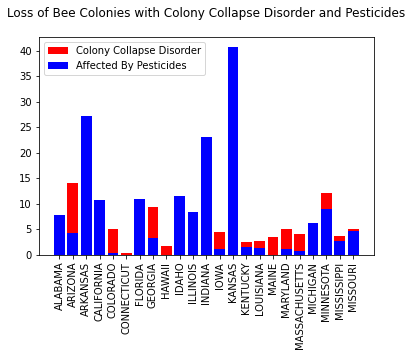

In [57]:
#Step histogram of both colony collapse disorder and pesticides percentages
fig, ax = plt.subplots()
rects1=ax.bar(grp1_usda_total_compare.index, grp1_usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'], label="Colony Collapse Disorder", color='red')
rects2=ax.bar(grp1_usda_total_compare.index, grp1_usda_total_compare['%_Colonies_Affected_by_Pesticides'], label="Affected By Pesticides", color='blue')
ax.set_xticklabels(grp1_usda_total_compare.index, rotation=90)
ax.set_title("Loss of Bee Colonies with Colony Collapse Disorder and Pesticides", pad=20)
#ax.set_xlabel("Number of Colonies Affected")
#ax.set_ylabel("Number of States")
ax.legend()
plt.savefig("bee_bar")
plt.show()

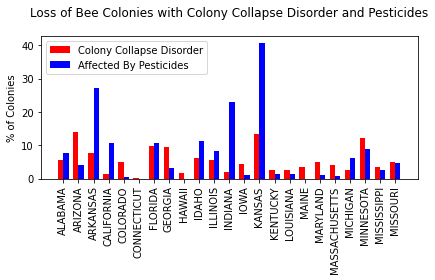

In [64]:
x = np.arange(len(grp1_usda_total_compare))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, grp1_usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'], width, label="Colony Collapse Disorder", color='red')
rects2 = ax.bar(x + width/2, grp1_usda_total_compare['%_Colonies_Affected_by_Pesticides'], width, label="Affected By Pesticides", color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of Colonies')
ax.set_title("Loss of Bee Colonies with Colony Collapse Disorder and Pesticides", pad=20)
ax.set_xticks(x)
ax.set_xticklabels(grp1_usda_total_compare.index, rotation=90)
ax.legend()

fig.tight_layout()

plt.show()

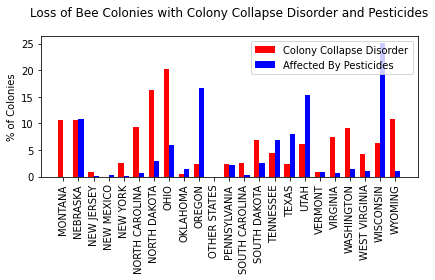

In [73]:
x = np.arange(len(grp1_usda_total_compare))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, grp2_usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'], width, label="Colony Collapse Disorder", color='red')
rects2 = ax.bar(x + width/2, grp2_usda_total_compare['%_Colonies_Affected_by_Pesticides'], width, label="Affected By Pesticides", color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of Colonies')
ax.set_title("Loss of Bee Colonies with Colony Collapse Disorder and Pesticides", pad=20)
ax.set_xticks(x)
ax.set_xticklabels(grp2_usda_total_compare.index, rotation=90)
ax.legend()

fig.tight_layout()

plt.show()

<ipython-input-131-d4a45b01b684>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(usda_total_compare["location_desc"], rotation=90)


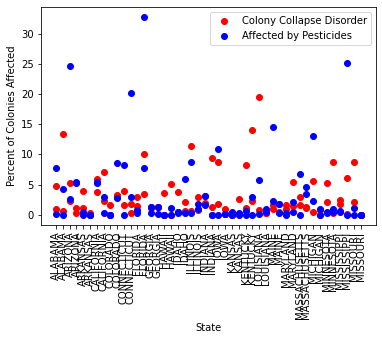

In [131]:
#Created a scatterplot to reflect percentages of colony collapse disorder and colonies affected by pesticides
fig, ax = plt.subplots()
ax.scatter(usda_total_compare["location_desc"], usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'], color="red", label="Colony Collapse Disorder")
ax.scatter(usda_total_compare["location_desc"], usda_total_compare['%_Colonies_Affected_by_Pesticides'], color="blue", label="Affected by Pesticides")
ax.legend()
ax.set_xticklabels(usda_total_compare["location_desc"], rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Percent of Colonies Affected")
plt.show()


<ipython-input-168-b046bb6af75a>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grp1_usda_total_compare.index, rotation=90)


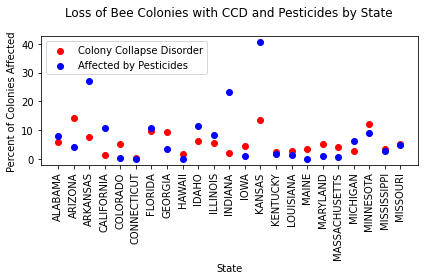

In [168]:
#Created a scatterplot to reflect percentages of colony collapse disorder and colonies affected by pesticides
fig, ax = plt.subplots()
ax.scatter(grp1_usda_total_compare.index, grp1_usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'], color="red", label="Colony Collapse Disorder")
ax.scatter(grp1_usda_total_compare.index, grp1_usda_total_compare['%_Colonies_Affected_by_Pesticides'], color="blue", label="Affected by Pesticides")
ax.legend()
ax.set_title("Loss of Bee Colonies with CCD and Pesticides by State", pad=20)
ax.set_xticklabels(grp1_usda_total_compare.index, rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Percent of Colonies Affected")
plt.tight_layout()
plt.savefig("grp1_scatter")
plt.show()

<ipython-input-169-ff91cd7e9ff8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grp2_usda_total_compare.index, rotation=90)


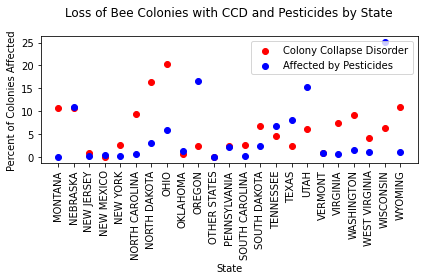

In [169]:
#Created a scatterplot to reflect percentages of colony collapse disorder and colonies affected by pesticides
fig, ax = plt.subplots()
ax.scatter(grp2_usda_total_compare.index, grp2_usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'], color="red", label="Colony Collapse Disorder")
ax.scatter(grp2_usda_total_compare.index, grp2_usda_total_compare['%_Colonies_Affected_by_Pesticides'], color="blue", label="Affected by Pesticides")
ax.legend()
#Pad is spacing between title and plot
ax.set_title("Loss of Bee Colonies with CCD and Pesticides by State", pad=20)
ax.set_xticklabels(grp2_usda_total_compare.index, rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Percent of Colonies Affected")
plt.tight_layout()
plt.savefig("grp2_scatter")
plt.show()

In [132]:
usda_total_compare.describe()


,%_Colonies_Affected_by_Pesticides,%_Colonies_Lost_to_Colony_Collapse_Disorder
count,92.000000,92.000000
mean,3.052174,2.875000
std,5.809721,3.539015
min,0.000000,0.000000
25%,0.000000,0.680000
50%,0.500000,1.580000
75%,3.025000,3.575000
max,32.800000,19.500000


In [133]:
np.corrcoef(usda_total_compare['%_Colonies_Affected_by_Pesticides'], usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'] )


array([[ 1.        , -0.08112837],
       [-0.08112837,  1.        ]])